In [1]:
import pandas as pd
import numpy as np
import smogn
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

In [2]:
import lightgbm as lgb
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [3]:
from sklearn.preprocessing import StandardScaler


X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [4]:
y_2_train = np.load('y_2_train.npy')
y_2_test = np.load('y_2_test.npy')
y_3_train = np.load('y_3_train.npy')
y_3_test = np.load('y_3_test.npy')

X_train_class = np.copy(X_train)
y_train_class = np.copy(y_train)
X_test_class = np.copy(X_test)
y_test_class = np.copy(y_test)

scaler = StandardScaler().fit(X_train_class)
X_train_class = scaler.transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


In [5]:
volume_train = np.load('volume_train.npy')
volume_test = np.load('volume_test.npy')
intensity_train = np.load('intensity_train.npy')
intensity_test = np.load('intensity_test.npy')

In [6]:
# RRegression Values modeifications
#y_2_train[y_2_train > 10] = 10.0
#y_2_test[y_2_test > 10] = 10.0



In [7]:
X_train = np.concatenate((X_train, volume_train.reshape(-1, 1), intensity_train.reshape(-1, 1)), axis=1)
X_test = np.concatenate((X_test,  volume_test.reshape(-1, 1), intensity_test.reshape(-1, 1)), axis=1)

In [8]:
print(X_train.shape, X_test.shape)

(2552, 22) (639, 22)


In [9]:
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [10]:
#lgb_train = lgb.Dataset(X_train, y_2_train)


In [11]:
print(X_train)

[[44.         51.         54.         ...  0.93        2.92800617
   1.0561496 ]
 [84.         86.         88.         ...  0.7         2.90679431
   0.96961027]
 [93.         88.         89.         ...  0.83        1.91104388
   1.04489899]
 ...
 [71.         70.         71.         ...  1.32        2.6939857
   0.92522639]
 [33.         32.         30.         ...  3.75        2.23802543
   0.92389899]
 [20.         12.          3.         ...  1.37        2.75717139
   1.15812612]]


In [12]:
'''
polynom_fit_SMOTE_bus,
polynom_fit_SMOTE_star,
ROSE,
Gazzah,
SPY,
MSMOTE,
AHC,
RWO_sampling,
polynom_fit_SMOTE_mesh,
polynom_fit_SMOTE_poly
'''

'\npolynom_fit_SMOTE_bus,\npolynom_fit_SMOTE_star,\nROSE,\nGazzah,\nSPY,\nMSMOTE,\nAHC,\nRWO_sampling,\npolynom_fit_SMOTE_mesh,\npolynom_fit_SMOTE_poly\n'

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import sklearn.datasets as datasets
from sklearn.neural_network import MLPClassifier

dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifier = LGBMClassifier(boosting_type="gbdt",is_unbalance=True, random_state=5, 
                  n_estimators=300,num_leaves=30, max_depth=2,feature_fraction=0.5, 
                  bagging_fraction=0.8, bagging_freq=15, learning_rate=0.01)




# Classifier Testing

# training the best techniques using the entire dataset
X_samp, y_samp= sv.Gazzah(proportion=1.5).sample(X_train, y_train)
classifier.fit(X_samp, y_samp)
preds2 = classifier.predict(X_test)
print(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))
preds_train = classifier.predict(X_train)



2023-03-22 16:47:02,669:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 1.5, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2023-03-22 16:47:02,671:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2023-03-22 16:47:02,672:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2023-03-22 16:47:02,690:INFO:Gazzah: Removing 822 majority samples


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[[60.         56.         52.         ...  0.28        2.16053176
   0.85668331]
 [28.         29.         27.         ...  0.5         1.01021314
   0.99081022]
 [35.         30.         28.         ...  1.22        1.89860582
   1.33731353]
 ...
 [56.         60.         61.         ...  2.32        2.55423236
   0.85835308]
 [53.         51.         51.         ...  1.02        1.82251811
   1.56792855]
 [69.         54.         35.         ...  2.45        5.06959105
   1.29223478]]
Acc Score:  0.6964006259780907
Roc Auc Score:  0.5682398320948437
Precision Score:  0.1366120218579235
Recall Score:  0.4098360655737705
f1 score:  0.2049180

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds2)

array([[420, 158],
       [ 36,  25]], dtype=int64)

In [15]:
# Preparing prediction out
#X_test = np.concatenate((X_test, preds2.reshape(-1, 1)), axis=1)
#X_train = np.concatenate((X_train, preds_train.reshape(-1, 1)), axis=1)
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

lgb_eval = lgb.Dataset(X_test, y_2_test)

lgb_train = lgb.Dataset(X_train, y_2_train)



In [16]:
print(X_train.shape)

(2552, 22)


In [17]:
# defining parameters 
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=200)

[1]	valid_0's l2: 4.075	valid_0's l1: 0.799747
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l2: 4.07658	valid_0's l1: 0.800998
[3]	valid_0's l2: 4.08238	valid_0's l1: 0.801881
[4]	valid_0's l2: 4.09521	valid_0's l1: 0.803173
[5]	valid_0's l2: 4.10586	valid_0's l1: 0.804896
[6]	valid_0's l2: 4.11578	valid_0's l1: 0.805622
[7]	valid_0's l2: 4.13035	valid_0's l1: 0.807152
[8]	valid_0's l2: 4.13973	valid_0's l1: 0.806097
[9]	valid_0's l2: 4.15496	valid_0's l1: 0.806595
[10]	valid_0's l2: 4.17316	valid_0's l1: 0.808043
[11]	valid_0's l2: 4.18794	valid_0's l1: 0.809307
[12]	valid_0's l2: 4.20595	valid_0's l1: 0.810627
[13]	valid_0's l2: 4.22386	valid_0's l1: 0.81089
[14]	valid_0's l2: 4.24111	valid_0's l1: 0.812076
[15]	valid_0's l2: 4.2621	valid_0's l1: 0.813626
[16]	valid_0's l2: 4.26454	valid_0's l1: 0.812073
[17]	valid_0's l2: 4.27847	valid_0's l1: 0.812842
[18]	valid_0's l2: 4.29372	valid_0's l1: 0.813742
[19]	valid_0's l2: 4.31876	valid_0's l1: 0.81669
[2

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[53]	valid_0's l2: 4.63209	valid_0's l1: 0.840375
[54]	valid_0's l2: 4.63697	valid_0's l1: 0.840556
[55]	valid_0's l2: 4.65647	valid_0's l1: 0.844176
[56]	valid_0's l2: 4.66079	valid_0's l1: 0.844676
[57]	valid_0's l2: 4.66633	valid_0's l1: 0.84513
[58]	valid_0's l2: 4.67531	valid_0's l1: 0.847567
[59]	valid_0's l2: 4.69382	valid_0's l1: 0.851319
[60]	valid_0's l2: 4.69905	valid_0's l1: 0.853416
[61]	valid_0's l2: 4.69968	valid_0's l1: 0.853693
[62]	valid_0's l2: 4.71103	valid_0's l1: 0.856568
[63]	valid_0's l2: 4.72159	valid_0's l1: 0.858673
[64]	valid_0's l2: 4.72561	valid_0's l1: 0.860154
[65]	valid_0's l2: 4.73489	valid_0's l1: 0.862414
[66]	valid_0's l2: 4.74703	valid_0's l1: 0.865114
[67]	valid_0's l2: 4.75716	valid_0's l1: 0.867017
[68]	valid_0's l2: 4.76207	valid_0's l1: 0.868407
[69]	valid_0's l2: 4.7663	valid_0's l1: 0.868785
[70]	valid_0's l2: 4.77289	valid_0's l1: 0.870543
[71]	valid_0's l2: 4.78358	valid_0's l1: 0.873108
[72]	valid_0's l2: 4.78444	valid_0's l1: 0.873473
[7

In [18]:
preds = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
mean_squared_error(y_2_test, preds)

4.074998929168216

In [21]:
mean_absolute_error(y_2_test, preds)

0.7997474259057822

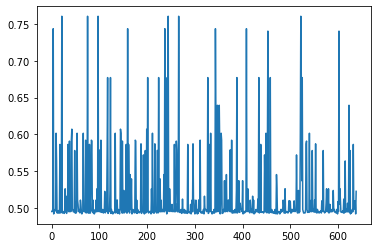

In [22]:
plt.plot(preds)

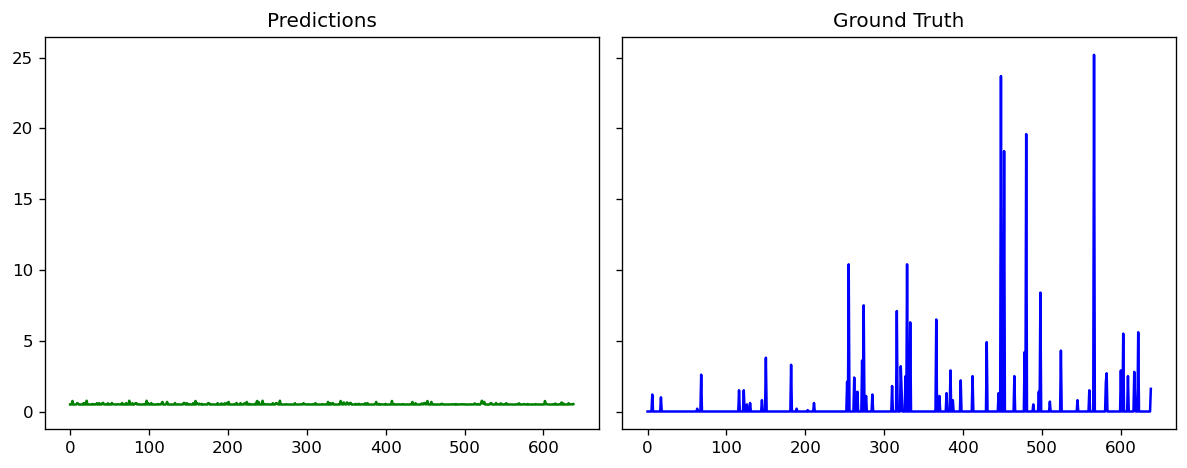

In [23]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

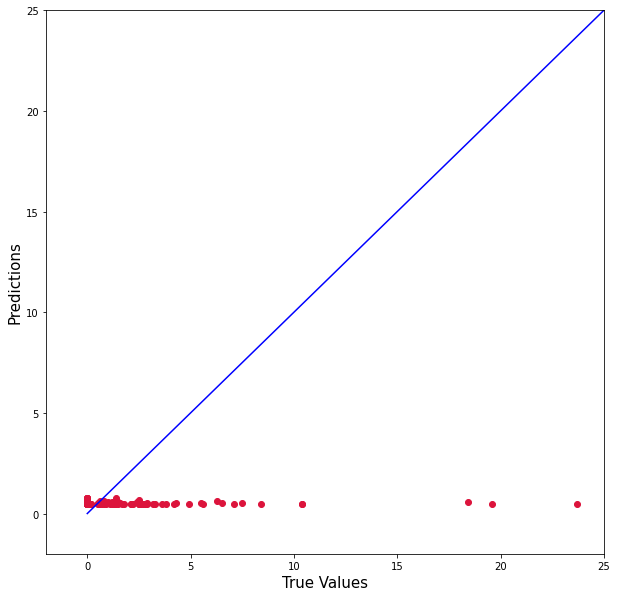

In [24]:
predicted_value = preds
true_value = y_2_test
fig = plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 25])
plt.ylim([-2, 25])
plt.show()
fig.savefig('predictions_vs_true_predicted_percipitation_lgbm.pdf')

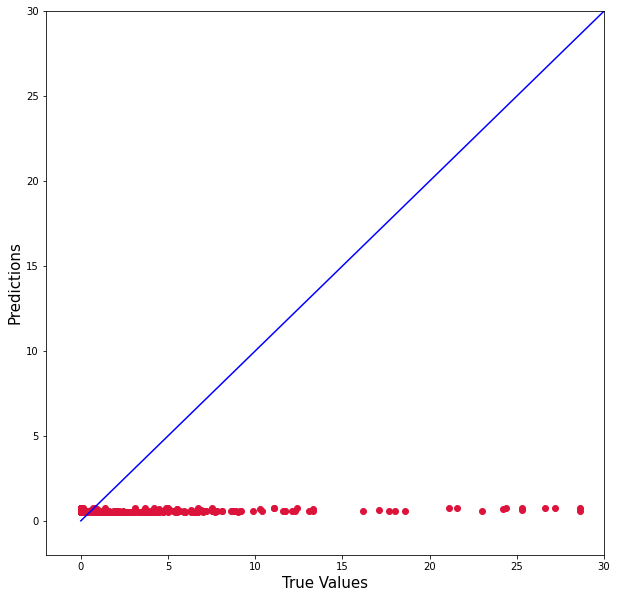

<Figure size 432x288 with 0 Axes>

In [25]:

predicted_value = model.predict(X_train)
true_value = y_2_train
fig = plt.figure(figsize=(10,10))

plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 30])
plt.ylim([-2, 30])
plt.show()

fig=plt.savefig('predictions_vs_true_readl_precipitation_training.pdf')

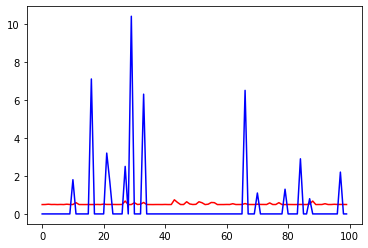

In [26]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[300:400],'r', label='Prediction')
plt.plot(temp_true[300:400],'b', label='Ground Truth')
plt.show()

In [27]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
#temp_y_train = np.copy(y_2_train)
#temp_y_test = np.copy(y_2_test)
#temp_y_train[temp_y_train > 5] = 5.0
#temp_y_test[temp_y_train > 5] = 5.0
print(X_train.shape)

(2552, 22)


In [29]:
np.digitize(y_test, [0, 1]) - 1
nb_classes = 2
y_train = np.eye(nb_classes)[y_train]
y_test = np.eye(nb_classes)[y_test]

import keras
from keras.layers import Dense, Softmax
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(16, kernel_initializer='normal', activation='relu', input_shape=(22,)))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='softmax'))
#loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy', )
model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=300, batch_size=64, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)

print('Acc Score: ',accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))
print('Roc Auc Score: ',roc_auc_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))
#print('Precision Score: ',precision_score(y_test, preds))
#print('Recall Score: ',recall_score(y_test, preds))
print('f1 score: ',f1_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))


Epoch 1/300
40/40 [==============================] - 1s 11ms/step - loss: 0.6728 - accuracy: 0.8950 - val_loss: 0.6434 - val_accuracy: 0.9045
Epoch 2/300
40/40 [==============================] - 0s 4ms/step - loss: 0.5826 - accuracy: 0.9052 - val_loss: 0.5005 - val_accuracy: 0.9045
Epoch 3/300
40/40 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.9052 - val_loss: 0.3691 - val_accuracy: 0.9045
Epoch 4/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.9052 - val_loss: 0.3541 - val_accuracy: 0.9045
Epoch 5/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.9052 - val_loss: 0.3487 - val_accuracy: 0.9045
Epoch 6/300
40/40 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.9052 - val_loss: 0.3446 - val_accuracy: 0.9045
Epoch 7/300
40/40 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.9052 - val_loss: 0.3420 - val_accuracy: 0.9045
Epoch 8/300


Epoch 59/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.9052 - val_loss: 0.3282 - val_accuracy: 0.9045
Epoch 60/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.9052 - val_loss: 0.3277 - val_accuracy: 0.9045
Epoch 61/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.9052 - val_loss: 0.3277 - val_accuracy: 0.9045
Epoch 62/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.9052 - val_loss: 0.3278 - val_accuracy: 0.9045
Epoch 63/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.9052 - val_loss: 0.3281 - val_accuracy: 0.9045
Epoch 64/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.9052 - val_loss: 0.3289 - val_accuracy: 0.9045
Epoch 65/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.9052 - val_loss: 0.3282 - val_accuracy: 0.9045
Epoch 

40/40 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9052 - val_loss: 0.3306 - val_accuracy: 0.9045
Epoch 117/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.9060 - val_loss: 0.3303 - val_accuracy: 0.9045
Epoch 118/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.9056 - val_loss: 0.3317 - val_accuracy: 0.9045
Epoch 119/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.9060 - val_loss: 0.3303 - val_accuracy: 0.9045
Epoch 120/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.9063 - val_loss: 0.3313 - val_accuracy: 0.9045
Epoch 121/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.9063 - val_loss: 0.3336 - val_accuracy: 0.9045
Epoch 122/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.9063 - val_loss: 0.3295 - val_accuracy: 0.9045
Epoch 123/300

40/40 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9095 - val_loss: 0.3389 - val_accuracy: 0.9045
Epoch 174/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2730 - accuracy: 0.9095 - val_loss: 0.3359 - val_accuracy: 0.9045
Epoch 175/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.9091 - val_loss: 0.3357 - val_accuracy: 0.9061
Epoch 176/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.9091 - val_loss: 0.3394 - val_accuracy: 0.9045
Epoch 177/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2723 - accuracy: 0.9099 - val_loss: 0.3359 - val_accuracy: 0.9061
Epoch 178/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.9091 - val_loss: 0.3384 - val_accuracy: 0.9061
Epoch 179/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2726 - accuracy: 0.9099 - val_loss: 0.3372 - val_accuracy: 0.9061
Epoch 180/300

40/40 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.9107 - val_loss: 0.3421 - val_accuracy: 0.9045
Epoch 231/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.9114 - val_loss: 0.3409 - val_accuracy: 0.9061
Epoch 232/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.9114 - val_loss: 0.3425 - val_accuracy: 0.9045
Epoch 233/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9111 - val_loss: 0.3390 - val_accuracy: 0.9061
Epoch 234/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.9118 - val_loss: 0.3462 - val_accuracy: 0.9045
Epoch 235/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.9118 - val_loss: 0.3390 - val_accuracy: 0.9061
Epoch 236/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.9118 - val_loss: 0.3394 - val_accuracy: 0.9061
Epoch 237/300

40/40 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.9138 - val_loss: 0.3436 - val_accuracy: 0.9014
Epoch 288/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9142 - val_loss: 0.3501 - val_accuracy: 0.8998
Epoch 289/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.9158 - val_loss: 0.3463 - val_accuracy: 0.9014
Epoch 290/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.9150 - val_loss: 0.3430 - val_accuracy: 0.9030
Epoch 291/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9150 - val_loss: 0.3465 - val_accuracy: 0.9030
Epoch 292/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.9154 - val_loss: 0.3427 - val_accuracy: 0.9030
Epoch 293/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.9142 - val_loss: 0.3439 - val_accuracy: 0.9030
Epoch 294/300

In [30]:
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))

array([[575,   3],
       [ 59,   2]], dtype=int64)

In [31]:
#mean_squared_error(y_2_test, preds)

ValueError: y_true and y_pred have different number of output (1!=2)

In [32]:
#mean_absolute_error(y_2_test, preds)

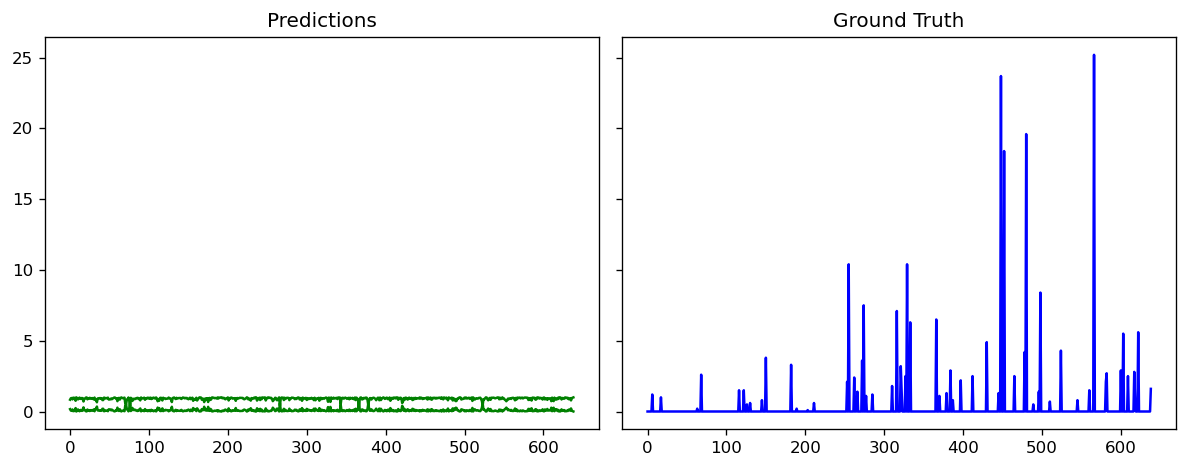

In [33]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [34]:
classifier.feature_importances_

array([ 29,  33,  38,  17,   3,  37,  16,  32,  59,  22,   8,  17,  14,
         4,  25,  35,  51,  18,  27,  64, 141, 210])

In [35]:
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5', 'vol', 'intensity']

<BarContainer object of 22 artists>

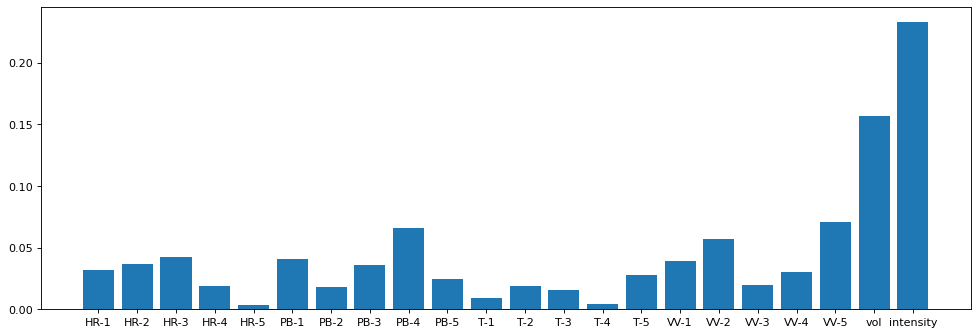

In [36]:
plt.figure(figsize=(15, 5), dpi=80)

plt.bar(features, classifier.feature_importances_ / np.sum(classifier.feature_importances_))

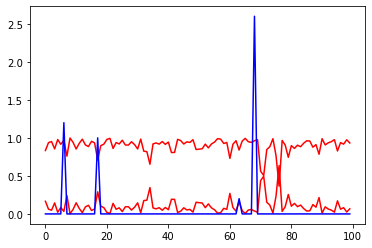

In [37]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[0:100],'r', label='Prediction')
plt.plot(temp_true[0:100],'b', label='Ground Truth')
plt.show()

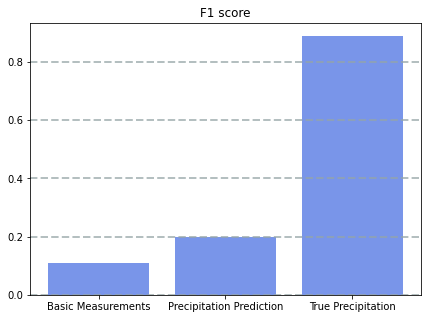

In [38]:
data = [0.11, 0.198, 0.89]

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)

x = ['Basic Measurements', 'Precipitation Prediction', 'True Precipitation']
plt.xticks(range(len(data)), x)

plt.bar(range(len(x)), data, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("F1 score")
plt.show()

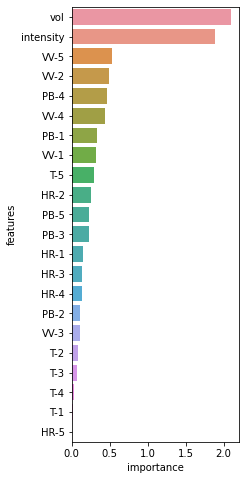

In [39]:
# plot feature importance
import seaborn as sns
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5', 'vol', 'intensity']
fi_df = pd.DataFrame(features, columns=['features'])
fi_df['importance'] = classifier.booster_.feature_importance(importance_type="gain") / 15000
fig, ax = plt.subplots(1, 1, figsize=(3, 8))
sns.barplot(
    x='importance'
    , y='features'
    , data=fi_df.sort_values(by=['importance'], ascending=False)
    , ax=ax
)

fig.savefig("feature_importance_real_precipitation.pdf",bbox_inches='tight')

In [40]:
import keras
from keras.layers import Dense, Softmax
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(12, kernel_initializer='normal', activation='relu', input_shape=(22,)))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
model.compile(loss='mse', optimizer='Adam', metrics='mse', )
model.fit(X_train, y_2_train, validation_data=(X_test, y_2_test), verbose=1, epochs=10, batch_size=64, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)

print('mse: ',mean_squared_error(y_2_test, preds))
print('mae: ',mean_absolute_error(y_2_test, preds))



Epoch 1/10
40/40 [==============================] - 1s 7ms/step - loss: 7.9625 - mse: 7.9625 - val_loss: 4.1624 - val_mse: 4.1624
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 7.9070 - mse: 7.9070 - val_loss: 4.1233 - val_mse: 4.1233
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 7.8307 - mse: 7.8307 - val_loss: 4.0941 - val_mse: 4.0941
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 7.7652 - mse: 7.7652 - val_loss: 4.0784 - val_mse: 4.0784
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 7.6924 - mse: 7.6924 - val_loss: 4.0768 - val_mse: 4.0768
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 7.6413 - mse: 7.6413 - val_loss: 4.0860 - val_mse: 4.0860
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 7.6035 - mse: 7.6035 - val_loss: 4.1257 - val_mse: 4.1257
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 7.5728 - mse: 7.57

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


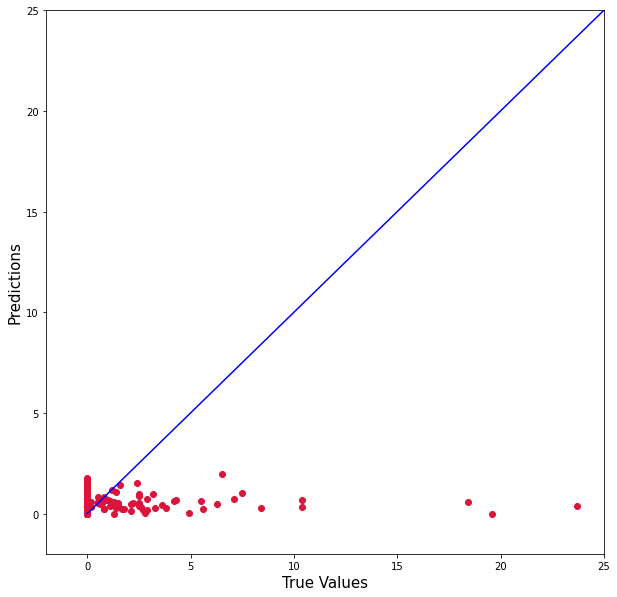

In [41]:
predicted_value = preds
true_value = y_2_test
fig = plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 25])
plt.ylim([-2, 25])
plt.show()
fig.savefig('predictions_vs_true_predicted_percipitation_dnn.pdf')